# Problem Statement: AllLife credit Card Customer Segmentation

Name: Ghaidaa

GitHub Link:

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import Data

In [2]:
cust_data = pd.read_csv('Credit Card Customer Data.csv')
#cust_data.head()
cust_data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


# EDA Analysis

# Univariate Analysis

In [3]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
(cust_data==0).sum() ## check number of zeros in the column

Sl_No                    0
Customer Key             0
Avg_Credit_Limit         0
Total_Credit_Cards       0
Total_visits_bank      100
Total_visits_online    144
Total_calls_made        97
dtype: int64

In [5]:
#Check for duplicte rows
cust_data.duplicated().sum()

0

In [6]:
# There are no duplicates

# Feature Engineering

In [7]:
#We will be focusing on the following five independent variable:

#1. Avg_Credit_Limit
#2. Total_Credit_Cards
#3. Total_visits_bank
#4. Total_visits_online
#5. Total_calls_made

#So we will drop/ignore Sl_No and Customer Key as they will not add valuable info. for our analysis

In [8]:
cust_data = cust_data.drop(['Sl_No','Customer Key'],axis = 1)
cust_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [9]:
# So now we are focusing on 5 independent variables

In [10]:
cust_data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


# Distribution Analysis

In [11]:
# the count shows that no missinf values are there
# The Avg_Credit_Limit has extreme values i.e. 200000 which will obviously result in having outliers.
# By looking at the Total_visits_online we observe that most of the data(median) falls between 2 and 4,
# while the max is 15 >> which most probably means having outliers.
# More statistical analysis will be explained after the outliers/skewness check.

# Tails and Outliers

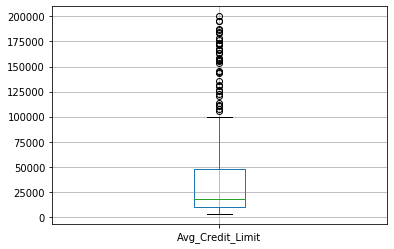

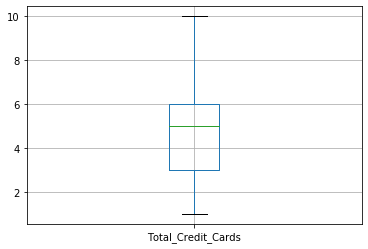

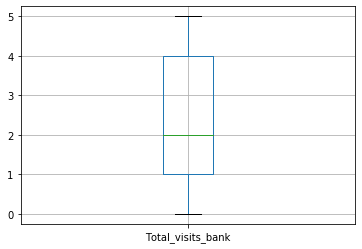

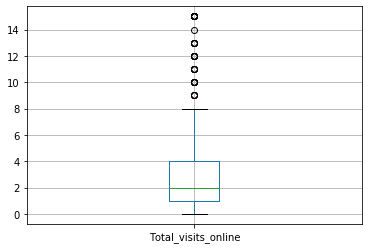

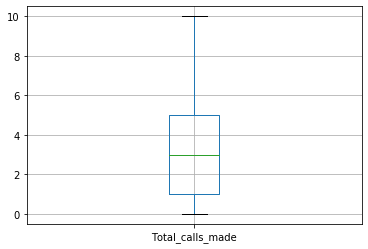

In [12]:
cols = cust_data.columns.tolist()
for col in cols:
    boxplot = cust_data.boxplot(column = col)
    plt.show()

# Checking Skewness

In [13]:
cust_data.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

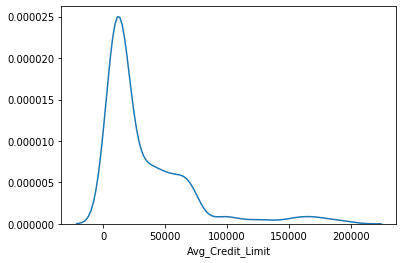

In [14]:
# To see skewness of Avg_Credit_Limit
sns.distplot(cust_data['Avg_Credit_Limit'],hist=False)
plt.show()

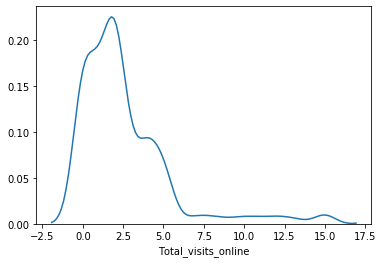

In [15]:
# To see skewness of Total_visits_online
sns.distplot(cust_data['Total_visits_online'],hist=False)
plt.show()

# Fix Skewness using Log

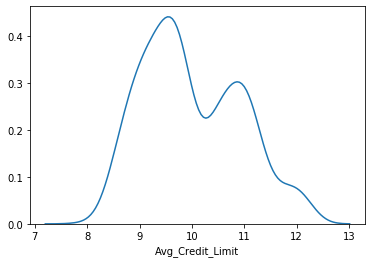

In [16]:
# Skewness of Avg_Credit_Limit after log transformation
sns.distplot(np.log(cust_data['Avg_Credit_Limit']),hist=False)
plt.show()

# log transformation to reduce skewness

In [17]:
cust_data['Avg_Credit_Limit'] = np.log(cust_data['Avg_Credit_Limit'])

In [18]:
#-- Implementing the log transform method for fixing the Total_visits_online ended up having -inf value ----

# -- so instead of using log transform, we will be using other simpler method that will hopefully fix the skewness
# -- and remove outliers.

# -- the method will be explained in below cell code.

# -- in this cell I am commenting the log transform method for Total_visits_online

#sns.distplot(np.log(cust_data['Total_visits_online']),hist=False)
#plt.show()

#cust_data['Total_visits_online'] = np.log(cust_data['Total_visits_online'])

In [19]:
# The alternative method is to delete the outliers.
# from the box plots above we can observe that any value greater than 8 is considered an outlier.
# this ends up having 37 outliers.
# 37 out of 660 is considered small portion so removing them will not affect the analysis

# Dropping all Total_visits_online values greater than 8:
cust_data = cust_data[cust_data.Total_visits_online < 9]

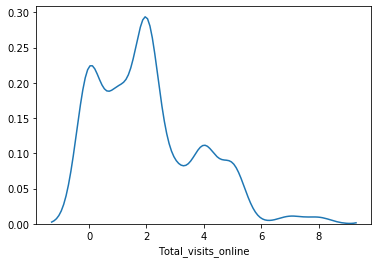

In [20]:
# To check thw skewness of Total_visits_online
sns.distplot(cust_data['Total_visits_online'],hist=False)
plt.show()

In [21]:
#As we can see the skewness is reduced by dropping the 37 outliers.

# Re-check outliers and tails

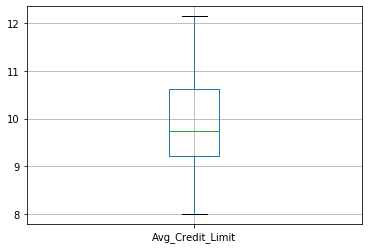

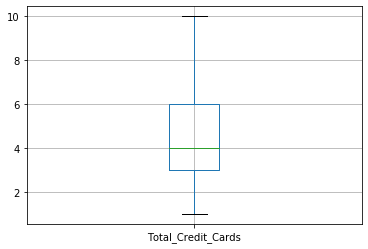

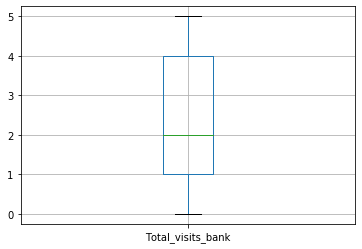

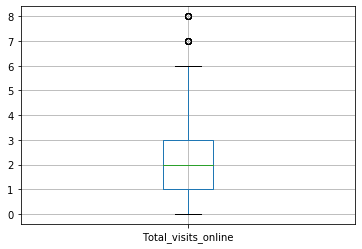

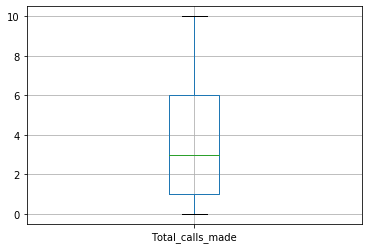

In [22]:
cols = cust_data.columns.tolist()
for col in cols:
    boxplot = cust_data.boxplot(column = col)
    plt.show()

In [23]:
# we can observe that we still have two outliers in the Total_visits_online, but we are fine with that
# as they will not affect our analysis

In [24]:
# we can see that fixing the skewness helped in removing the outliers.

In [25]:
#Try to statistically describe the data again:

cust_data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,623.000000,623.000000,623.000000,623.000000,623.000000
mean,9.888596,4.470305,2.512039,2.035313,3.714286
std,0.840346,1.957425,1.610686,1.746482,2.872181
min,8.006368,1.000000,0.000000,0.000000,0.000000
25%,9.210340,3.000000,1.000000,1.000000,1.000000
50%,9.740969,4.000000,2.000000,2.000000,3.000000
75%,10.621327,6.000000,4.000000,3.000000,6.000000
max,12.138864,10.000000,5.000000,8.000000,10.000000


In [26]:
# We observe that the total number of ocunt is reduced which make sence after dropping the outliers
# The Avg_Credit_Limit statistical values are stricktly dropped after applying the log function

In [27]:
# Scalling the data to have better sense:
# We can see that the values range of Avg_Credit_Limit differs from all other columns, so we need to scale the data:
cust_data_scaled = cust_data.apply(zscore)
cust_data_scaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.934482,-1.263032,-0.939509,-0.593276,-1.294232
2,1.108984,1.293397,-0.939509,0.552804,0.099556
3,0.500620,0.270826,-0.939509,-0.593276,0.099556
5,0.017735,-0.751746,-1.560861,-0.593276,1.493345
7,-0.324877,-0.751746,-1.560861,-0.593276,-0.945785
8,-1.633260,-1.263032,-1.560861,-0.020236,-0.597338
9,-2.241624,-0.240460,-1.560861,-0.593276,1.144898
10,-0.807763,-0.240460,-1.560861,1.698884,0.448004
11,-0.495302,-0.751746,-1.560861,-0.020236,1.144898
12,-0.694254,-1.774318,-0.318156,1.698884,1.841792


# Get an idea about the number of clusters

In [28]:
# to do so, run density plot and bivariate analyze the data.

# Density/ Distribution Plot

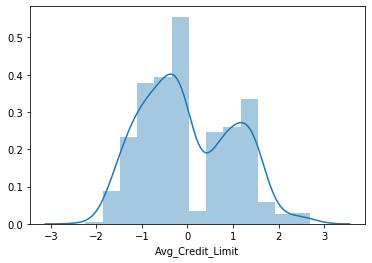

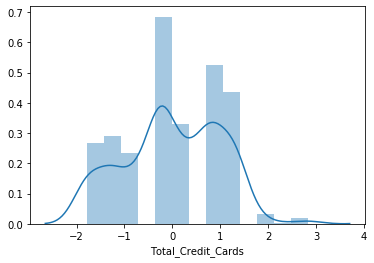

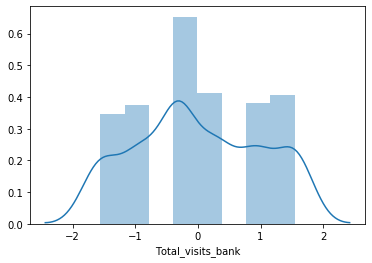

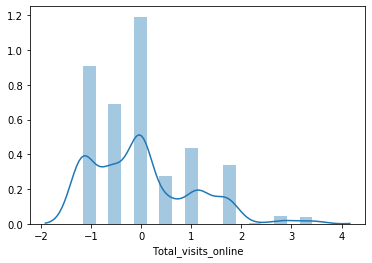

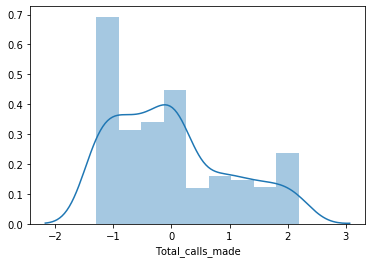

In [29]:
cols = cust_data_scaled.columns.tolist()
for col in cols:
    sns.distplot(cust_data_scaled[col]);
    plt.show()

# Bivariate Analysis

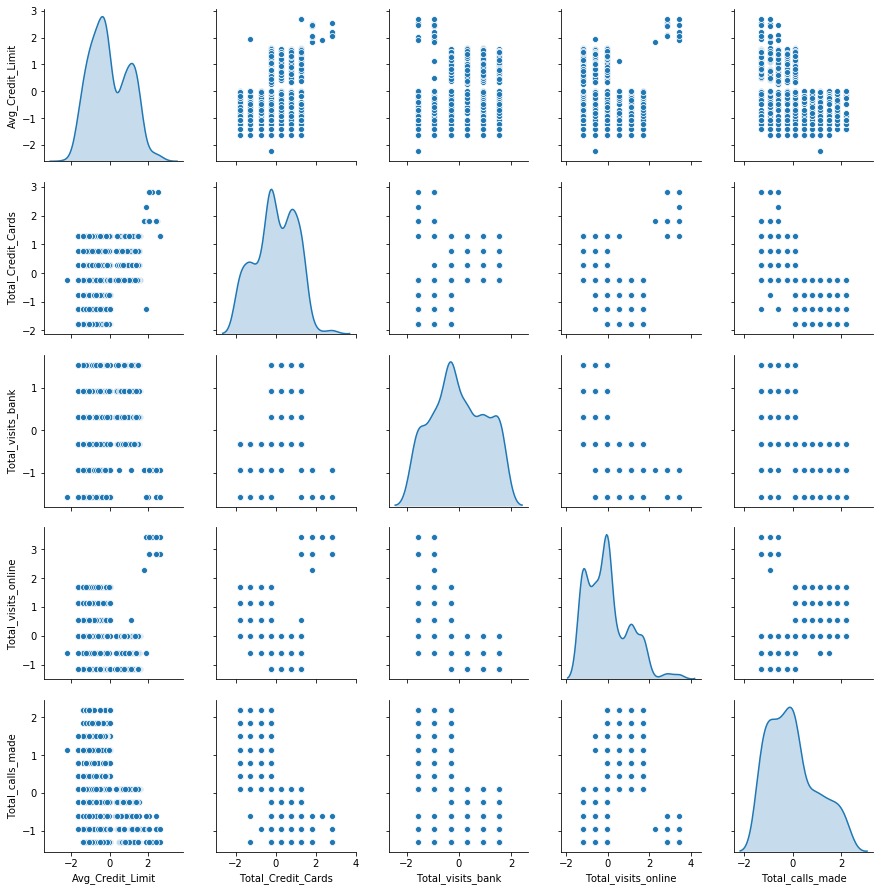

In [30]:
cust_data_attr = cust_data_scaled.iloc[:, 0:5]
sns.pairplot(cust_data_attr, diag_kind='kde')

In [31]:
# below will show number of clusters in each variable:

#1. Avg_Credit_Limit: 3 or 4
#2. Total_Credit_Cards: 4
#3. Total_visits_bank: 5
#4. Total_visits_online: 5
#5. Total_calls_made: 3

# Above expected clusters are arbitrary, which means that we will try these numbers while running the K-means and
# check which is the best number of clusters for each variable.

# To find the optimal number of clusters; below code cell is performed:

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

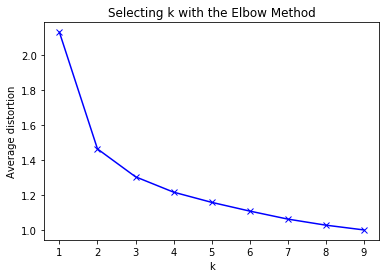

In [32]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cust_data_scaled)
    prediction=model.predict(cust_data_scaled)
    meanDistortions.append(sum(np.min(cdist(cust_data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / cust_data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [33]:
# By using the K-means elbow method, we conclude that the optimal (best) number of clusters to use is 3 clusters.

In [34]:
# Starting with 3 clusters

In [35]:
final_model=KMeans(3)
final_model.fit(cust_data_scaled)
prediction=final_model.predict(cust_data_scaled)

#Append the prediction 
cust_data["GROUP"] = prediction
cust_data_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
cust_data.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,11.512925,2,1,1,0,0
2,10.819778,7,1,3,4,0
3,10.308953,5,1,1,4,0
5,9.903488,3,0,1,8,1
7,9.615805,3,0,1,1,2


In [36]:
km_silhouette_score = silhouette_score(cust_data_scaled, final_model.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % km_silhouette_score)

Silhouetter Score: 0.460


# Analyze the clusters 

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


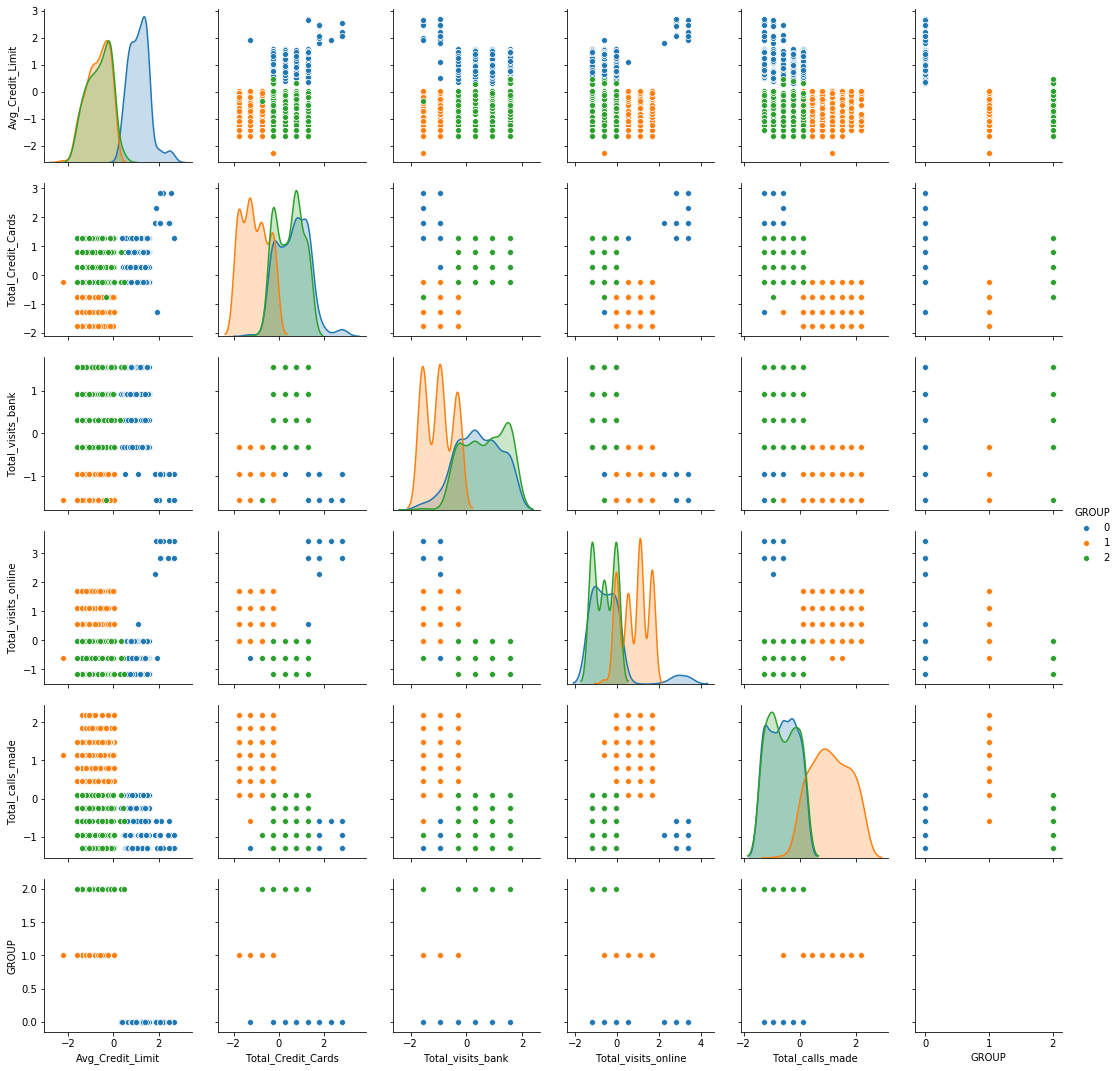

In [37]:
sns.pairplot(cust_data_scaled, hue="GROUP") #to visualize the clusters

# Analyzing K-means clusters using boxplots

In [38]:
cust_clust = (cust_data.groupby(['GROUP']))
cust_clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,10.852382,5.754386,3.206140,1.364035,1.960526
1,9.312109,2.398190,0.936652,3.542986,6.900452
2,9.357907,5.419540,3.603448,1.000000,1.965517


In [39]:
cust_clust['GROUP'].value_counts()  

GROUP  GROUP
0      0        228
1      1        221
2      2        174
Name: GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25a05048>,
      dtype=object)

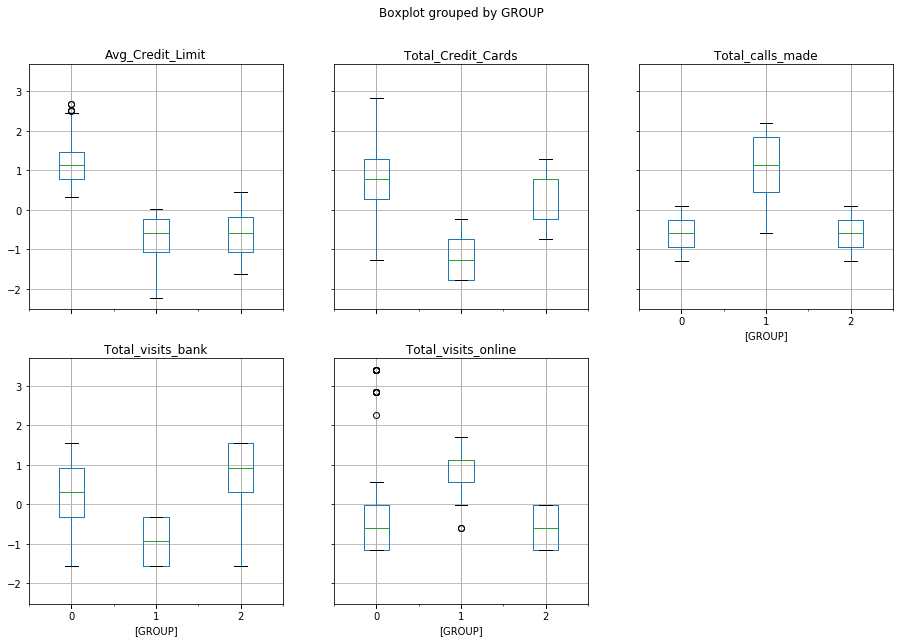

In [40]:
cust_data_scaled.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

In [41]:
# separate the target variable (GROUP) and save it in the y variable. Also the X contains the independant variables.
X = cust_data_scaled.iloc[:,0:5].values
y = cust_data_scaled.iloc[:,5].values

In [42]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [43]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00165101  0.49058713  0.23861247 -0.19702311 -0.43492753]
 [ 0.49058713  0.9991634   0.52974558 -0.40633666 -0.6497854 ]
 [ 0.23861247  0.52974558  0.9962139  -0.59974974 -0.60477371]
 [-0.19702311 -0.40633666 -0.59974974  0.9985439   0.50844997]
 [-0.43492753 -0.6497854  -0.60477371  0.50844997  1.00542945]]
Eigenvectors 
[[ 0.34203577  0.74058345  0.52126732 -0.25060994  0.00476671]
 [ 0.48078344  0.2420848  -0.4707333   0.40330741  0.57096017]
 [ 0.46887727 -0.37702664 -0.14074093 -0.76339065  0.18823319]
 [-0.42050743  0.49962539 -0.63042637 -0.4104089  -0.08760759]
 [-0.5051598  -0.03400709  0.29907376 -0.15276467  0.79427636]]

Eigenvalues 
[2.90292499 0.92759224 0.48294385 0.35121995 0.33632063]


In [44]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 58.04687126  76.59500029  86.25194262  93.27493461 100.        ]


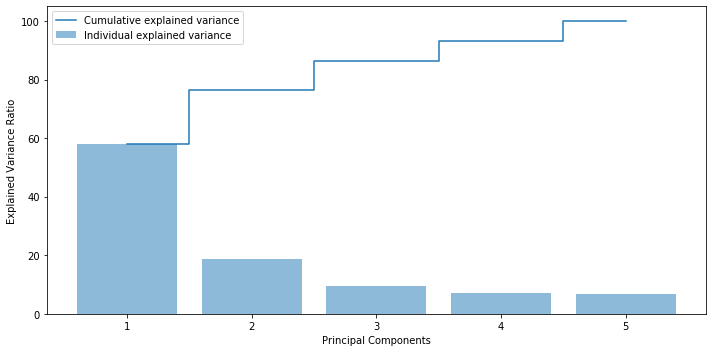

In [45]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [46]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.902924993426977,
  array([ 0.34203577,  0.48078344,  0.46887727, -0.42050743, -0.5051598 ])),
 (0.9275922404389172,
  array([ 0.74058345,  0.2420848 , -0.37702664,  0.49962539, -0.03400709])),
 (0.48294384570160637,
  array([ 0.52126732, -0.4707333 , -0.14074093, -0.63042637,  0.29907376])),
 (0.35121994593927097,
  array([-0.25060994,  0.40330741, -0.76339065, -0.4104089 , -0.15276467])),
 (0.33632063141037793,
  array([ 0.00476671,  0.57096017,  0.18823319, -0.08760759,  0.79427636]))]

In [47]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(5,1), 
                      eigen_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', w)
X_pca = X_train.dot(w)
X_test_pca = X_test.dot(w)

Matrix W:
 [[ 0.34203577  0.74058345]
 [ 0.48078344  0.2420848 ]
 [ 0.46887727 -0.37702664]
 [-0.42050743  0.49962539]
 [-0.5051598  -0.03400709]]


In [48]:
X_train.shape, w.shape, X_pca.shape, X_test_pca.shape

((498, 5), (5, 2), (498, 2), (125, 2))

# We will use Logistic regression, RandomForest and AdaBoost

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_pca, y_train)
print ('After PCA score', model.score(X_test_pca, y_test))

Before PCA score 0.992
After PCA score 0.904


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print ('Before PCA score', clf.score(X_test, y_test))

clf.fit(X_pca, y_train)
print ('After PCA score', clf.score(X_test_pca, y_test))

Before PCA score 0.984
After PCA score 0.936


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_pca, y_train)
print ('After PCA score', model.score(X_test_pca, y_test))

Before PCA score 0.968
After PCA score 0.912


# Hierarchical Clustering

In [52]:
# First we need to delete GROUP so it will not influence or effect our hierarchical clustering
# Also drop it from cust_data
cust_data_scaled = cust_data_scaled.drop(['GROUP'],axis = 1)
cust_data = cust_data.drop(['GROUP'],axis = 1)
cust_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.934482,-1.263032,-0.939509,-0.593276,-1.294232
2,1.108984,1.293397,-0.939509,0.552804,0.099556
3,0.500620,0.270826,-0.939509,-0.593276,0.099556
5,0.017735,-0.751746,-1.560861,-0.593276,1.493345
7,-0.324877,-0.751746,-1.560861,-0.593276,-0.945785


In [53]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# link_type = ['average']

In [54]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(cust_data_scaled)
cust_data['H-AVG-GROUP'] = model.labels_
cust_data_scaled['H-AVG-GROUP'] = model.labels_
cust_data.head(10)



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,H-AVG-GROUP
0,11.512925,2,1,1,0,0
2,10.819778,7,1,3,4,0
3,10.308953,5,1,1,4,0
5,9.903488,3,0,1,8,2
7,9.615805,3,0,1,1,0
8,8.517193,2,0,2,2,2
9,8.006368,4,0,1,7,2
10,9.210340,4,0,5,5,2
11,9.472705,3,0,2,7,2
12,9.305651,1,2,5,9,2


In [55]:
cust_clust_H = cust_data.groupby(['H-AVG-GROUP'])
cust_clust_H.mean()
Z = linkage(cust_data_scaled, metric = 'euclidean', method = 'average')
c, coph_dists = cophenet(Z , pdist(cust_data_scaled))
print ('For Average linkage the Cophenetic Coeff. is: ' + str(c))

For Average linkage the Cophenetic Coeff. is: 0.9058683965128509


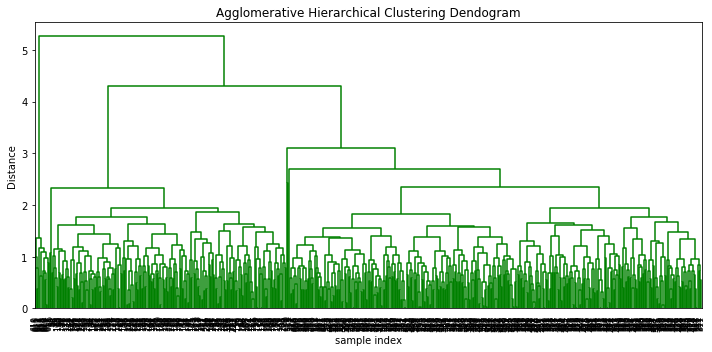

In [56]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

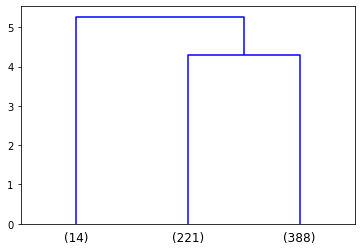

In [57]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [58]:
max_d = 4.2

In [59]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [60]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(cust_data_scaled,clusters)

0.548723791843642

In [63]:
cust_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,H-AVG-GROUP
0,11.512925,2,1,1,0,0
2,10.819778,7,1,3,4,0
3,10.308953,5,1,1,4,0
5,9.903488,3,0,1,8,2
7,9.615805,3,0,1,1,0


In [64]:
#number of customers in each cluster:
cust_data['H-AVG-GROUP'].value_counts()  

0    388
2    221
1     14
Name: H-AVG-GROUP, dtype: int64

# Analyze the clusters 

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


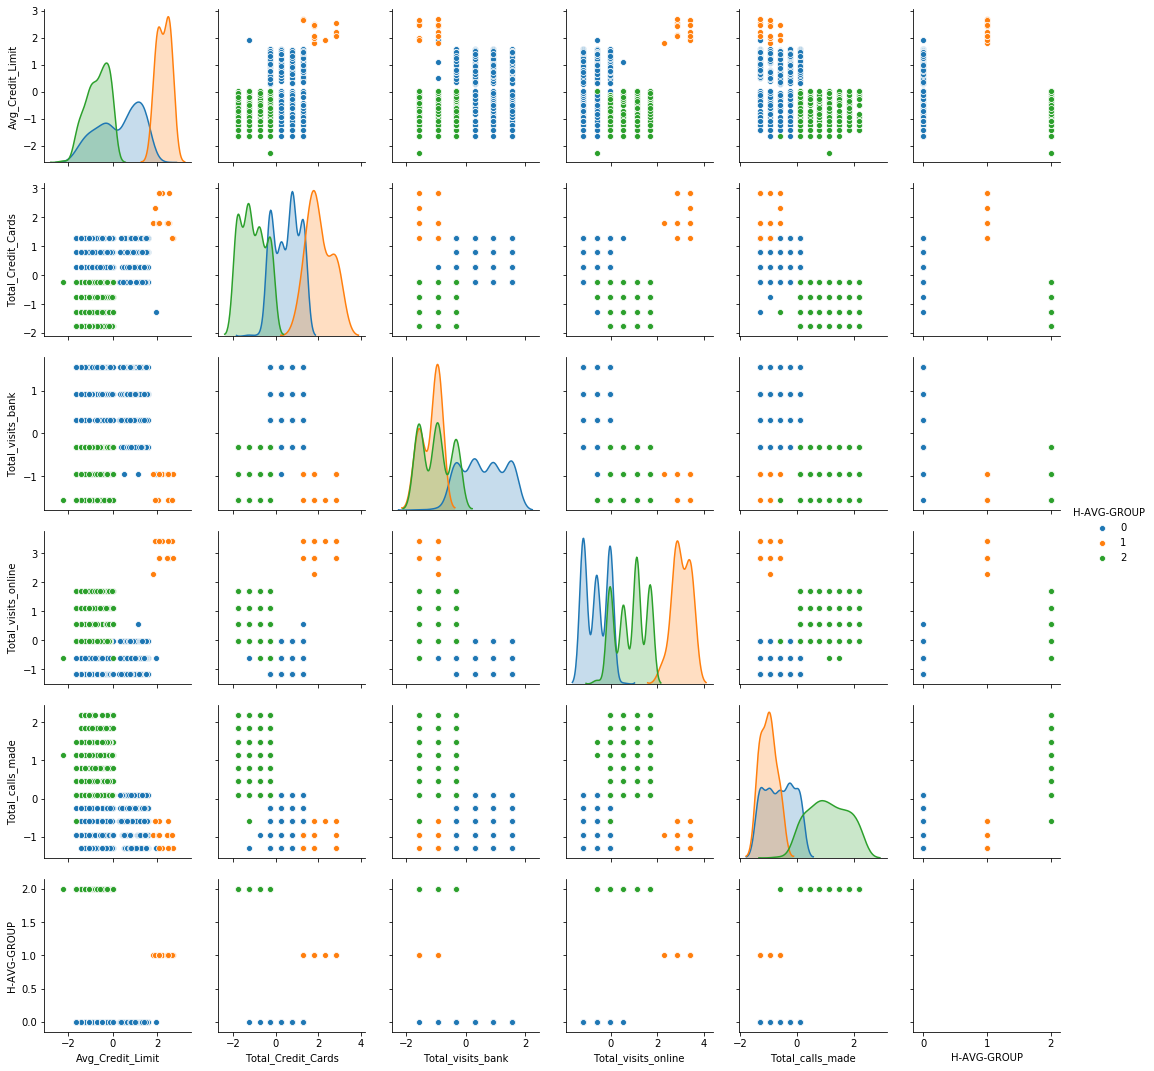

In [65]:
sns.pairplot(cust_data_scaled, hue="H-AVG-GROUP") #to visualize the clusters

# Analyzing Average Linkage using Box Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a276e6470>,
      dtype=object)

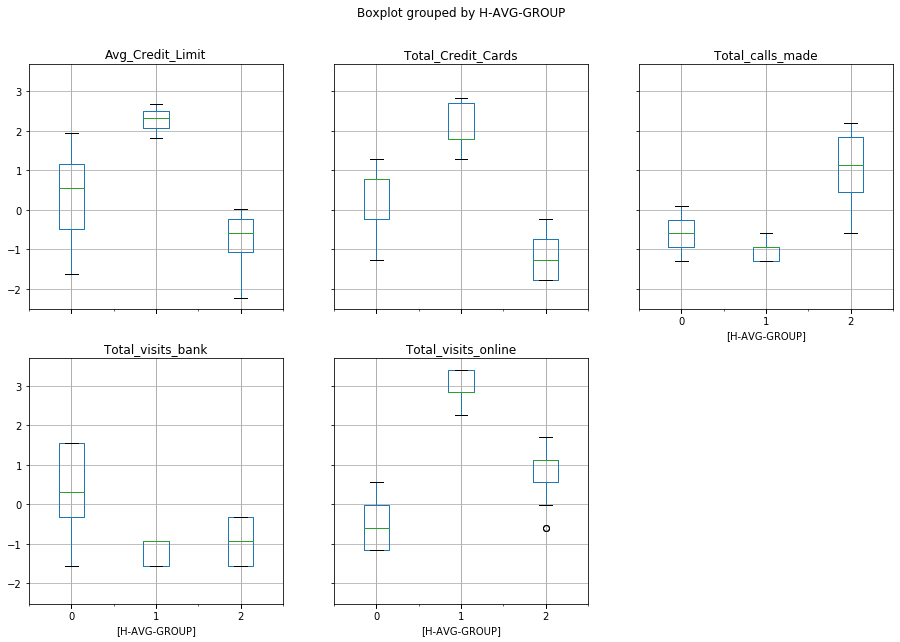

In [66]:
cust_data_scaled.boxplot(by='H-AVG-GROUP', layout = (2,3),figsize=(15,10))

In [67]:
# separate the target variable (GROUP) and save it in the y variable. Also the X contains the independant variables.
X = cust_data_scaled.iloc[:,0:5].values
y = cust_data_scaled.iloc[:,5].values

In [68]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [69]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00165101  0.49058713  0.23861247 -0.19702311 -0.43492753]
 [ 0.49058713  0.9991634   0.52974558 -0.40633666 -0.6497854 ]
 [ 0.23861247  0.52974558  0.9962139  -0.59974974 -0.60477371]
 [-0.19702311 -0.40633666 -0.59974974  0.9985439   0.50844997]
 [-0.43492753 -0.6497854  -0.60477371  0.50844997  1.00542945]]
Eigenvectors 
[[ 0.34203577  0.74058345  0.52126732 -0.25060994  0.00476671]
 [ 0.48078344  0.2420848  -0.4707333   0.40330741  0.57096017]
 [ 0.46887727 -0.37702664 -0.14074093 -0.76339065  0.18823319]
 [-0.42050743  0.49962539 -0.63042637 -0.4104089  -0.08760759]
 [-0.5051598  -0.03400709  0.29907376 -0.15276467  0.79427636]]

Eigenvalues 
[2.90292499 0.92759224 0.48294385 0.35121995 0.33632063]


In [70]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 58.04687126  76.59500029  86.25194262  93.27493461 100.        ]


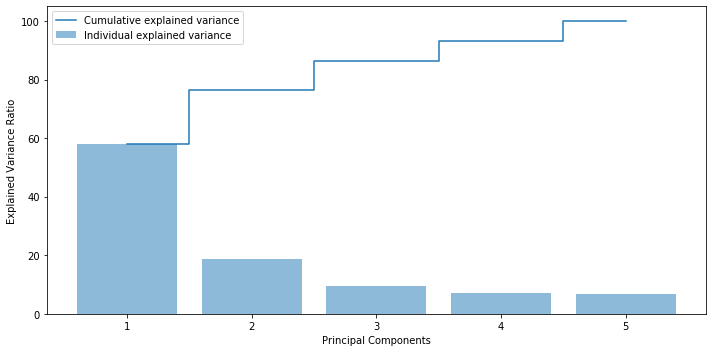

In [71]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [72]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.902924993426977,
  array([ 0.34203577,  0.48078344,  0.46887727, -0.42050743, -0.5051598 ])),
 (0.9275922404389172,
  array([ 0.74058345,  0.2420848 , -0.37702664,  0.49962539, -0.03400709])),
 (0.48294384570160637,
  array([ 0.52126732, -0.4707333 , -0.14074093, -0.63042637,  0.29907376])),
 (0.35121994593927097,
  array([-0.25060994,  0.40330741, -0.76339065, -0.4104089 , -0.15276467])),
 (0.33632063141037793,
  array([ 0.00476671,  0.57096017,  0.18823319, -0.08760759,  0.79427636]))]

In [73]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(5,1), 
                      eigen_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', w)
X_pca = X_train.dot(w)
X_test_pca = X_test.dot(w)

Matrix W:
 [[ 0.34203577  0.74058345]
 [ 0.48078344  0.2420848 ]
 [ 0.46887727 -0.37702664]
 [-0.42050743  0.49962539]
 [-0.5051598  -0.03400709]]


In [74]:
X_train.shape, w.shape, X_pca.shape, X_test_pca.shape

((498, 5), (5, 2), (498, 2), (125, 2))

# We will use Logistic regression, RandomForest and AdaBoost

In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_pca, y_train)
print ('After PCA score', model.score(X_test_pca, y_test))

Before PCA score 1.0
After PCA score 1.0


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [76]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print ('Before PCA score', clf.score(X_test, y_test))

clf.fit(X_pca, y_train)
print ('After PCA score', clf.score(X_test_pca, y_test))

Before PCA score 0.992
After PCA score 1.0


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_pca, y_train)
print ('After PCA score', model.score(X_test_pca, y_test))

Before PCA score 0.968
After PCA score 1.0


# link_type = ['complete']

In [78]:
#First we need to delete H-AVG-GROUP so it will not influence or effect our hierarchical clustering
#also remove it from cust_data
cust_data_scaled = cust_data_scaled.drop(['H-AVG-GROUP'],axis = 1)
cust_data = cust_data.drop(['H-AVG-GROUP'],axis = 1)
cust_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.934482,-1.263032,-0.939509,-0.593276,-1.294232
2,1.108984,1.293397,-0.939509,0.552804,0.099556
3,0.500620,0.270826,-0.939509,-0.593276,0.099556
5,0.017735,-0.751746,-1.560861,-0.593276,1.493345
7,-0.324877,-0.751746,-1.560861,-0.593276,-0.945785


In [79]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
model.fit(cust_data_scaled)
cust_data['H-COM-GROUP'] = model.labels_
cust_data_scaled['H-COM-GROUP'] = model.labels_
cust_data.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,H-COM-GROUP
0,11.512925,2,1,1,0,0
2,10.819778,7,1,3,4,0
3,10.308953,5,1,1,4,0
5,9.903488,3,0,1,8,2
7,9.615805,3,0,1,1,0
8,8.517193,2,0,2,2,2
9,8.006368,4,0,1,7,2
10,9.210340,4,0,5,5,2
11,9.472705,3,0,2,7,2
12,9.305651,1,2,5,9,2


In [80]:
cust_clust_H = cust_data.groupby(['H-COM-GROUP'])
cust_clust_H.mean()
Z = linkage(cust_data_scaled, metric = 'euclidean', method = 'complete')
c, coph_dists = cophenet(Z , pdist(cust_data_scaled))
print ('For Average linkage the Cophenetic Coeff. is: ' + str(c))

For Average linkage the Cophenetic Coeff. is: 0.879265149547442


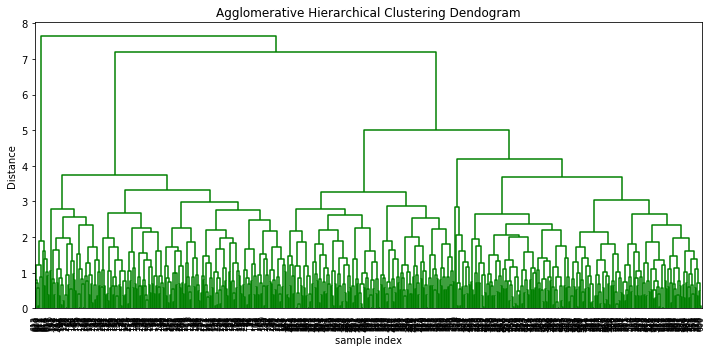

In [81]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

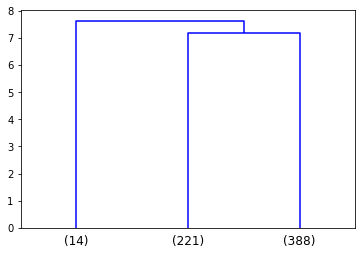

In [82]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [83]:
max_d = 7.1

In [84]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [85]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(cust_data_scaled,clusters)

0.548723791843642

In [86]:
#number of customers in each cluster:
cust_data['H-COM-GROUP'].value_counts()  

0    388
2    221
1     14
Name: H-COM-GROUP, dtype: int64

# Analyze the clusters 

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


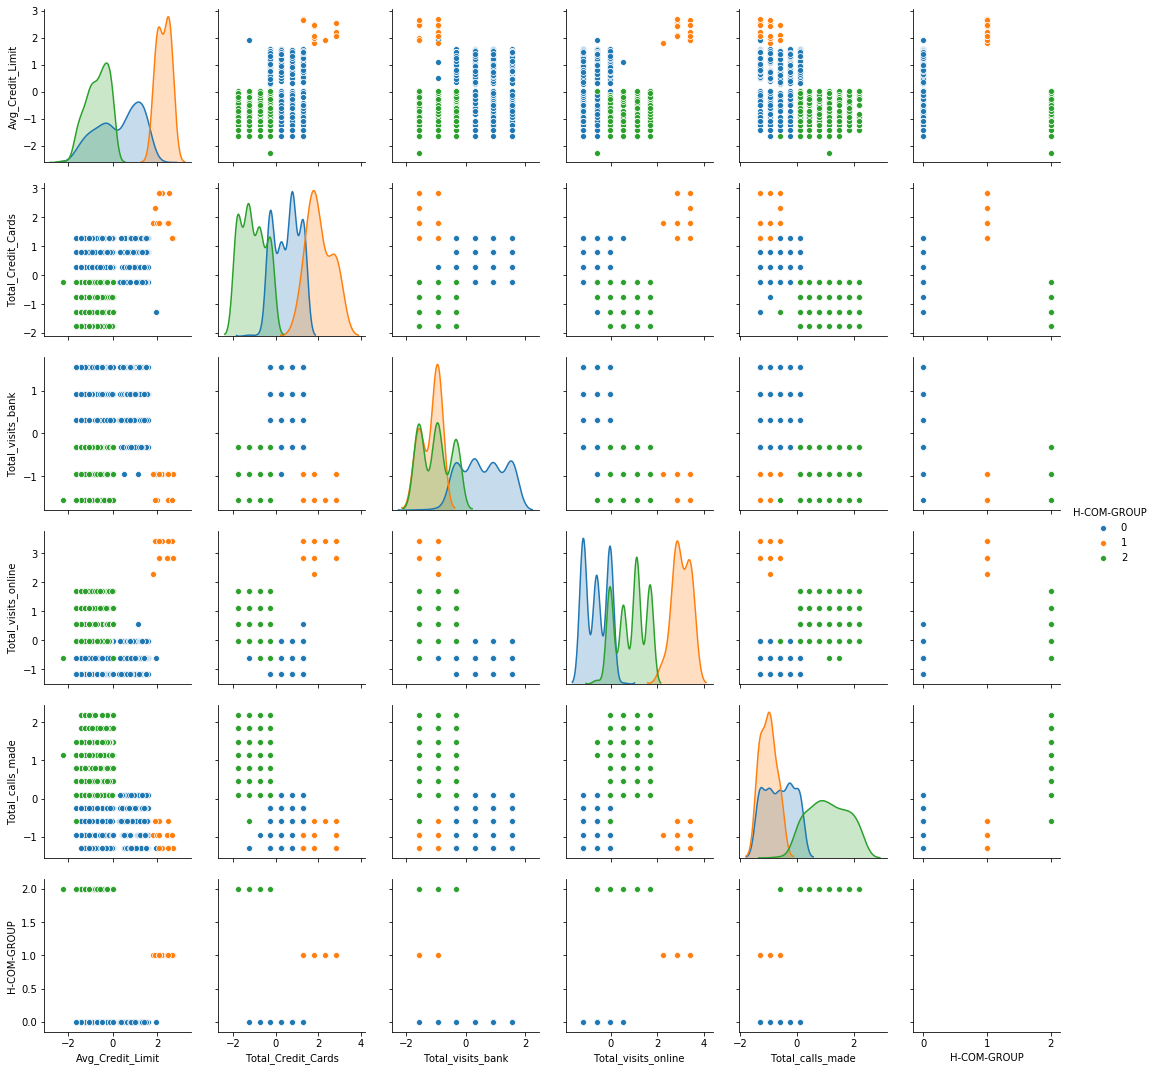

In [87]:
sns.pairplot(cust_data_scaled, hue="H-COM-GROUP") #to visualize the clusters

# Analyzing Complete Linkage using Box Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2904bc50>,
      dtype=object)

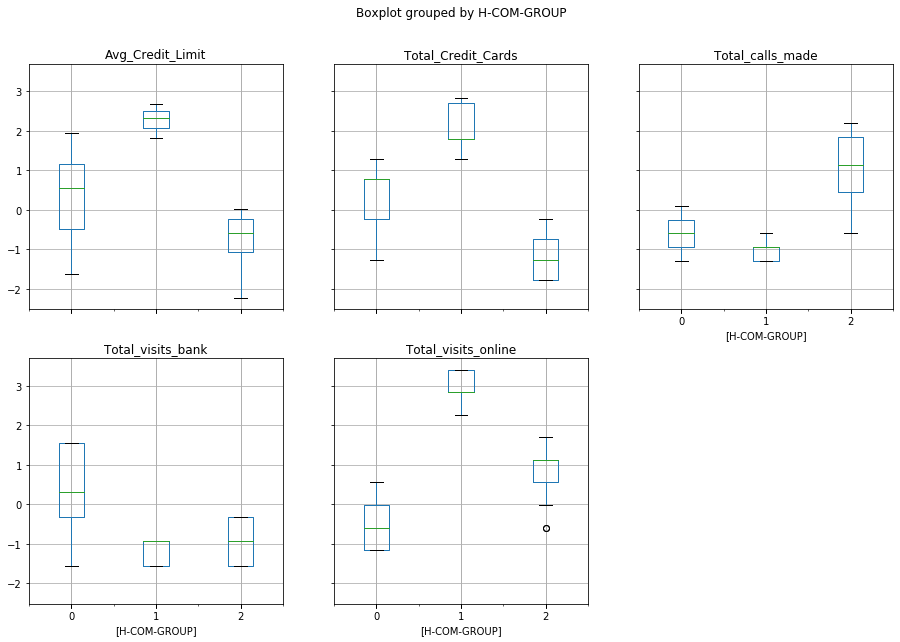

In [88]:
cust_data_scaled.boxplot(by='H-COM-GROUP', layout = (2,3),figsize=(15,10))

In [89]:
# separate the target variable (GROUP) and save it in the y variable. Also the X contains the independant variables.
X = cust_data_scaled.iloc[:,0:5].values
y = cust_data_scaled.iloc[:,5].values

In [90]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [91]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00165101  0.49058713  0.23861247 -0.19702311 -0.43492753]
 [ 0.49058713  0.9991634   0.52974558 -0.40633666 -0.6497854 ]
 [ 0.23861247  0.52974558  0.9962139  -0.59974974 -0.60477371]
 [-0.19702311 -0.40633666 -0.59974974  0.9985439   0.50844997]
 [-0.43492753 -0.6497854  -0.60477371  0.50844997  1.00542945]]
Eigenvectors 
[[ 0.34203577  0.74058345  0.52126732 -0.25060994  0.00476671]
 [ 0.48078344  0.2420848  -0.4707333   0.40330741  0.57096017]
 [ 0.46887727 -0.37702664 -0.14074093 -0.76339065  0.18823319]
 [-0.42050743  0.49962539 -0.63042637 -0.4104089  -0.08760759]
 [-0.5051598  -0.03400709  0.29907376 -0.15276467  0.79427636]]

Eigenvalues 
[2.90292499 0.92759224 0.48294385 0.35121995 0.33632063]


In [92]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 58.04687126  76.59500029  86.25194262  93.27493461 100.        ]


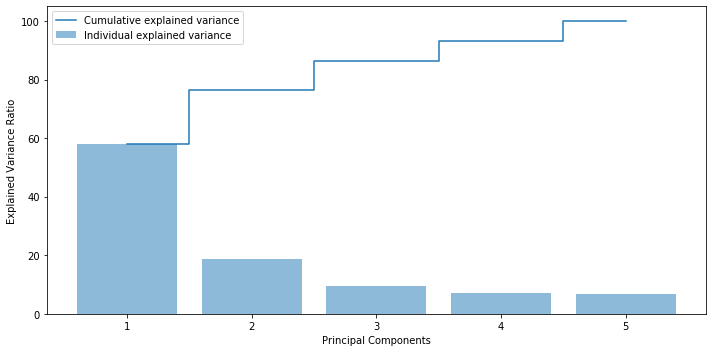

In [93]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [94]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.902924993426977,
  array([ 0.34203577,  0.48078344,  0.46887727, -0.42050743, -0.5051598 ])),
 (0.9275922404389172,
  array([ 0.74058345,  0.2420848 , -0.37702664,  0.49962539, -0.03400709])),
 (0.48294384570160637,
  array([ 0.52126732, -0.4707333 , -0.14074093, -0.63042637,  0.29907376])),
 (0.35121994593927097,
  array([-0.25060994,  0.40330741, -0.76339065, -0.4104089 , -0.15276467])),
 (0.33632063141037793,
  array([ 0.00476671,  0.57096017,  0.18823319, -0.08760759,  0.79427636]))]

In [95]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(5,1), 
                      eigen_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', w)
X_pca = X_train.dot(w)
X_test_pca = X_test.dot(w)

Matrix W:
 [[ 0.34203577  0.74058345]
 [ 0.48078344  0.2420848 ]
 [ 0.46887727 -0.37702664]
 [-0.42050743  0.49962539]
 [-0.5051598  -0.03400709]]


In [96]:
X_train.shape, w.shape, X_pca.shape, X_test_pca.shape

((498, 5), (5, 2), (498, 2), (125, 2))

# We will use Logistic regression, RandomForest and AdaBoost

In [97]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_pca, y_train)
print ('After PCA score', model.score(X_test_pca, y_test))

Before PCA score 1.0
After PCA score 1.0


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [98]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print ('Before PCA score', clf.score(X_test, y_test))

clf.fit(X_pca, y_train)
print ('After PCA score', clf.score(X_test_pca, y_test))

Before PCA score 1.0
After PCA score 1.0


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [99]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_pca, y_train)
print ('After PCA score', model.score(X_test_pca, y_test))

Before PCA score 0.968
After PCA score 1.0


# link_type = ['ward']

In [100]:
#First we need to delete H-AVG-GROUP so it will not influence or effect our hierarchical clustering
#also drop it from cust_data
cust_data_scaled = cust_data_scaled.drop(['H-COM-GROUP'],axis = 1)
cust_data = cust_data.drop(['H-COM-GROUP'],axis = 1)
cust_data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.934482,-1.263032,-0.939509,-0.593276,-1.294232
2,1.108984,1.293397,-0.939509,0.552804,0.099556
3,0.500620,0.270826,-0.939509,-0.593276,0.099556
5,0.017735,-0.751746,-1.560861,-0.593276,1.493345
7,-0.324877,-0.751746,-1.560861,-0.593276,-0.945785


In [101]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(cust_data_scaled)
cust_data['H-WRD-GROUP'] = model.labels_
cust_data_scaled['H-WRD-GROUP'] = model.labels_
cust_data.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,H-WRD-GROUP
0,11.512925,2,1,1,0,0
2,10.819778,7,1,3,4,0
3,10.308953,5,1,1,4,0
5,9.903488,3,0,1,8,1
7,9.615805,3,0,1,1,2
8,8.517193,2,0,2,2,1
9,8.006368,4,0,1,7,1
10,9.210340,4,0,5,5,1
11,9.472705,3,0,2,7,1
12,9.305651,1,2,5,9,1


In [102]:
cust_clust_H = cust_data.groupby(['H-WRD-GROUP'])
cust_clust_H.mean()
Z = linkage(cust_data_scaled, metric = 'euclidean', method = 'ward')
c, coph_dists = cophenet(Z , pdist(cust_data_scaled))
print ('For Average linkage the Cophenetic Coeff. is: ' + str(c))

For Average linkage the Cophenetic Coeff. is: 0.7885963067487705


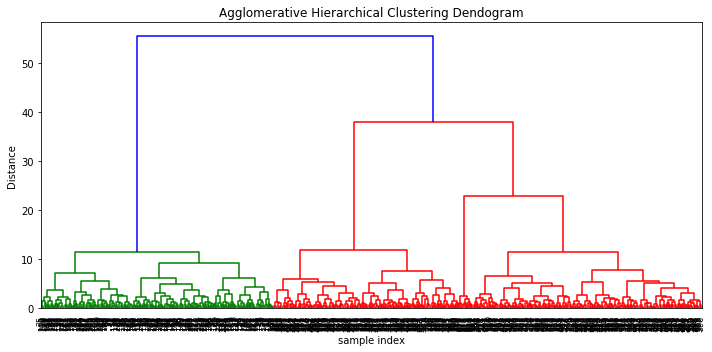

In [103]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

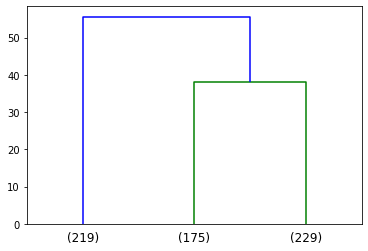

In [104]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [105]:
max_d = 37

In [106]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [107]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(cust_data_scaled,clusters)

0.45596337855421915

In [108]:
#number of customers in each cluster:
cust_data['H-WRD-GROUP'].value_counts() 

0    229
1    219
2    175
Name: H-WRD-GROUP, dtype: int64

# Analyze the clusters 

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


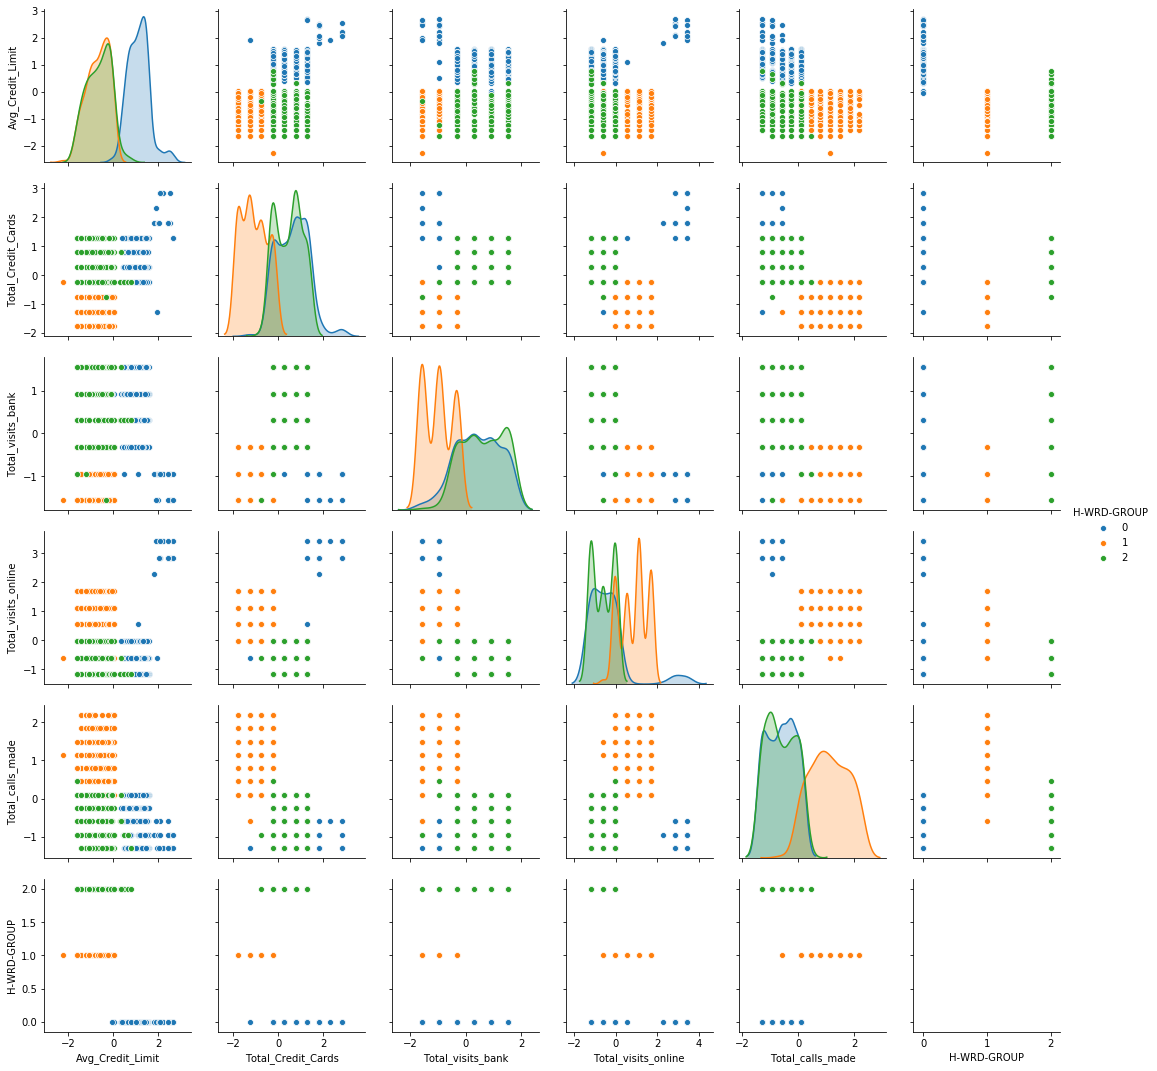

In [109]:
sns.pairplot(cust_data_scaled, hue="H-WRD-GROUP") #to visualize the clusters

# Analyzing Ward Linkage using Box Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2bf5d5f8>,
      dtype=object)

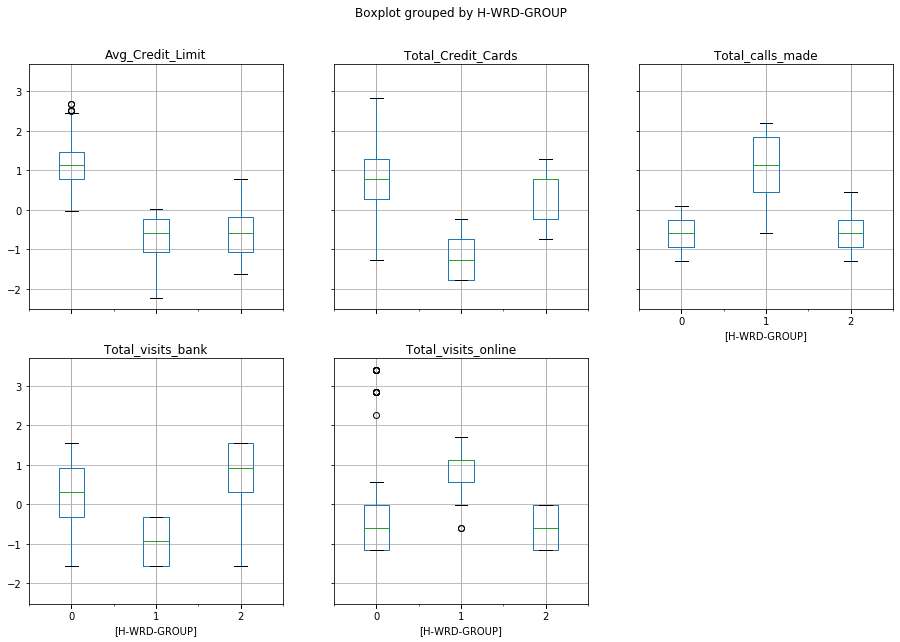

In [110]:
cust_data_scaled.boxplot(by='H-WRD-GROUP', layout = (2,3),figsize=(15,10))

In [111]:
# separate the target variable (GROUP) and save it in the y variable. Also the X contains the independant variables.
X = cust_data_scaled.iloc[:,0:5].values
y = cust_data_scaled.iloc[:,5].values

In [112]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [113]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00165101  0.49058713  0.23861247 -0.19702311 -0.43492753]
 [ 0.49058713  0.9991634   0.52974558 -0.40633666 -0.6497854 ]
 [ 0.23861247  0.52974558  0.9962139  -0.59974974 -0.60477371]
 [-0.19702311 -0.40633666 -0.59974974  0.9985439   0.50844997]
 [-0.43492753 -0.6497854  -0.60477371  0.50844997  1.00542945]]
Eigenvectors 
[[ 0.34203577  0.74058345  0.52126732 -0.25060994  0.00476671]
 [ 0.48078344  0.2420848  -0.4707333   0.40330741  0.57096017]
 [ 0.46887727 -0.37702664 -0.14074093 -0.76339065  0.18823319]
 [-0.42050743  0.49962539 -0.63042637 -0.4104089  -0.08760759]
 [-0.5051598  -0.03400709  0.29907376 -0.15276467  0.79427636]]

Eigenvalues 
[2.90292499 0.92759224 0.48294385 0.35121995 0.33632063]


In [114]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 58.04687126  76.59500029  86.25194262  93.27493461 100.        ]


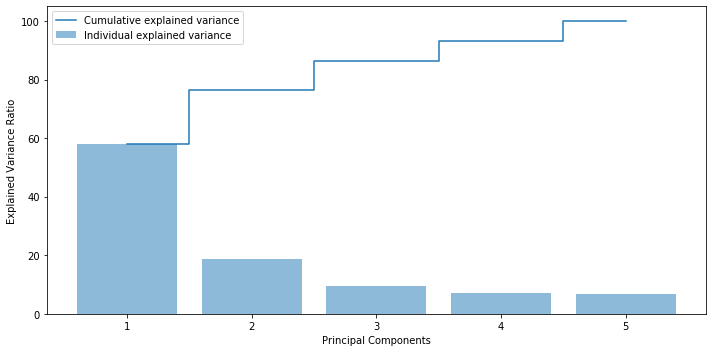

In [115]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [116]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.902924993426977,
  array([ 0.34203577,  0.48078344,  0.46887727, -0.42050743, -0.5051598 ])),
 (0.9275922404389172,
  array([ 0.74058345,  0.2420848 , -0.37702664,  0.49962539, -0.03400709])),
 (0.48294384570160637,
  array([ 0.52126732, -0.4707333 , -0.14074093, -0.63042637,  0.29907376])),
 (0.35121994593927097,
  array([-0.25060994,  0.40330741, -0.76339065, -0.4104089 , -0.15276467])),
 (0.33632063141037793,
  array([ 0.00476671,  0.57096017,  0.18823319, -0.08760759,  0.79427636]))]

In [117]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(5,1), 
                      eigen_pairs[1][1].reshape(5,1)))
print('Matrix W:\n', w)
X_pca = X_train.dot(w)
X_test_pca = X_test.dot(w)

Matrix W:
 [[ 0.34203577  0.74058345]
 [ 0.48078344  0.2420848 ]
 [ 0.46887727 -0.37702664]
 [-0.42050743  0.49962539]
 [-0.5051598  -0.03400709]]


In [118]:
X_train.shape, w.shape, X_pca.shape, X_test_pca.shape

((498, 5), (5, 2), (498, 2), (125, 2))

# We will use Logistic regression, RandomForest and AdaBoost

In [119]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_pca, y_train)
print ('After PCA score', model.score(X_test_pca, y_test))

Before PCA score 0.976
After PCA score 0.888


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [120]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print ('Before PCA score', clf.score(X_test, y_test))

clf.fit(X_pca, y_train)
print ('After PCA score', clf.score(X_test_pca, y_test))

Before PCA score 0.968
After PCA score 0.896


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [121]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
print ('Before PCA score', model.score(X_test, y_test))

model.fit(X_pca, y_train)
print ('After PCA score', model.score(X_test_pca, y_test))

Before PCA score 0.968
After PCA score 0.88


# Compare K-means with Hierarchical clustering

In [122]:
#####################################################################
# To compare K-means with hierarchical clustering, PCA was performed.
#####################################################################

# To check the details of PCA analysis, please refer to above clustering techniquies implemented, after each technique
# you will find its dedicated PCA analysis.
# before moving to the results, please check below abbreviations being used in analysis:
# 1. LR: Linear Regression
# 2. RF: Random Forest Classifier
# 3. AB: AdaBoost
# 4. B: Before PCA
# 5. A: After PCA

#Comparison Results:

#---- K-Means ---

#--LR [B:0.984     A:0.904]
#--RF [B:0.984     A:0.928]
#--AB [B:0.96     A:0.76]

#--> we conclude from K-means PCA results is that the score after the PCA is kinda less than before, which is
#--> considered good as we know by now that most probably we are not overfitting.

#---- Average Linkage ---

#--LR [B:1     A:1]
#--RF [B:0.984     A:1] >> we conclude that it is performing better than K-means in RF.
#--AB [B:0.968     A:1] >> we conclude that it is performing better than K-means in AB.
#--> * * * The Best Results * * *


#---- Complete Linkage ---

#--LR [B:1     A:1] >> Acting similarly to Average Linkage.
#--RF [B:1     A:1] >> no improvement here unlike in Average Linkage.
#--AB [B:0.968     A:1] >> we conclude that it is performing better than K-means and similar to Average linkage.


#---- Ward Linkage ---

#--LR [B:0.976     A:0.888] 
#--RF [B:0.968     A:0.864] 
#--AB [B:0.968     A:0.88] 
#--> wards clustering is showing the least scores among all above clustering techniques
#--> But overall it is still considered extremly good scores.

########################################################################################
# Comparing Cophenetic Coeff. between the three hierarchical clustering techniques used:
########################################################################################

# As a fact, the dendogram with the highest Cophenetic Coeff. is the most suitable for using in analysis & prediction
# so gooing back to above results we find that:
# 1. Average Linkage Cophenetic Coeff. = 0.905 [The best fits me]
# 2. Complete Linkage Cophenetic Coeff. = 0.879 [The Second best]
# 3. Ward Linkage Cophenetic Coeff. = 0.788 [The least best]
# --> Above Coeff. values makes sense to the analysis we made earlier in this cell. 
# --> Where the Linkage gave us the best PCA results.

######################################################################################
# Comparing Silhouetter Coeff. between K-means and hierarchical clustering techniques:
######################################################################################

# As a fact, the nearest the Silhouetter Coeff. to one, the better the cluster to me.
# And the more it is near to zero or -1 the worst it is to me.
# By going back to above analysis, we find below findings:
# 1. K-means Silhouetter Coeff. = 0.460
# 2. Average Linkage Silhouetter Coeff. = 0.5487
# 3. Complete Linkage Silhouetter Coeff. = 0.5487
# 4. Ward Linkage Silhouetter Coeff. = 0.4559
# above results also improve the analysis we made earlier in this cell.
# where we mentioned that Average Linkage and Complete Linkage are giving similar results to each other
# and also better results than K-means
# and that Ward Linkage is giving the least PCA scores ;although it is still considered good.

# by this we conclude that hierarchical clustering is performing better than K-means in our case study.

# Answering Key Questions

In [123]:
# The Answer to the key questions will depend on the best clustering technique we reached by our study above
# Which is the Average/ Complete Linkage clustering technique.

1. How many different segments of customers are there?

* Answer: 3 different segments.

2. How are these segments differ from each other?

* Answer:

    1. By the number of custemers belonging to each cluster.
    2. By the size of the segment itself
    3. By overlapping and how could we merge these segments together based on the no. of clusters.

3. What are your Recommendations to the bank?

* Answer:

Since these customers most of them fall in cluster 0 which is having "higher number in total visits to the bank", it is better for the bank to market to them during thier visits to the bank. 

And regarding the customers belonging to cluster 1 which is the second larger segment, the customers in this segment have the highest avg_credit_card limit and more no. of credit cards, to the best way to market to them is online (as they use it the most).

Regarding customers in cluster 2 which are having the least avg_credit_card limit and least no. of credit cards, the bank should focus on marketing to them through phone calls.

So all what the bank needs, is to know this customer falls under which cluster.